# Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ultraplot as uplt

import psdist as ps
import psdist.plot as psv

In [2]:
uplt.rc["cmap.discrete"] = False
uplt.rc["cmap.sequential"] = "mono"
uplt.rc["figure.facecolor"] = "white"
uplt.rc["grid"] = False

## 2D

In [3]:
names = [
    "gaussian",
    "waterbag",
]

gaussian


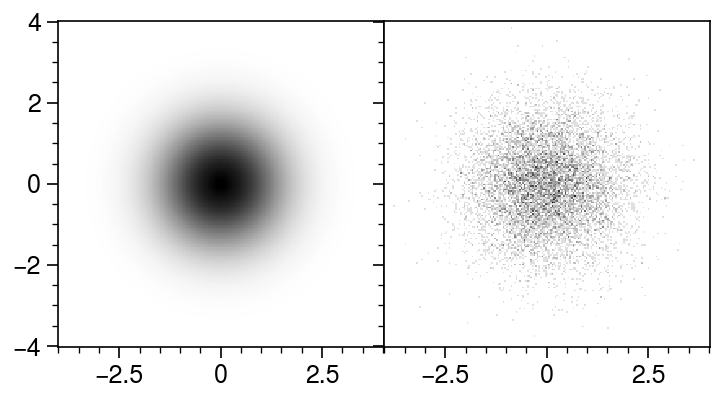

waterbag


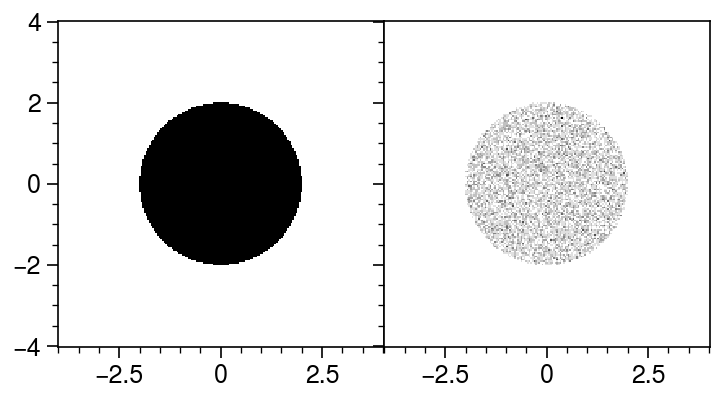

In [5]:
for name in names:
    print(name)

    nsamp = 10_000
    xmax = 4.0
    res = 200

    dist = ps.get_distribution(name=name, ndim=2)
    x = dist.sample(nsamp)

    fig, axs = uplt.subplots(ncols=2, figheight=2.0, space=0.0)

    hist = ps.Histogram(coords=(2 * [np.linspace(-xmax, xmax, res)]))
    hist.values = dist.prob(hist.points()).reshape((res, res))
    psv.hist.plot(hist=hist, ax=axs[0])

    hist.bin(x)
    psv.hist.plot(hist=hist, ax=axs[1])
    plt.show()

### ND 

ndim=3
gaussian


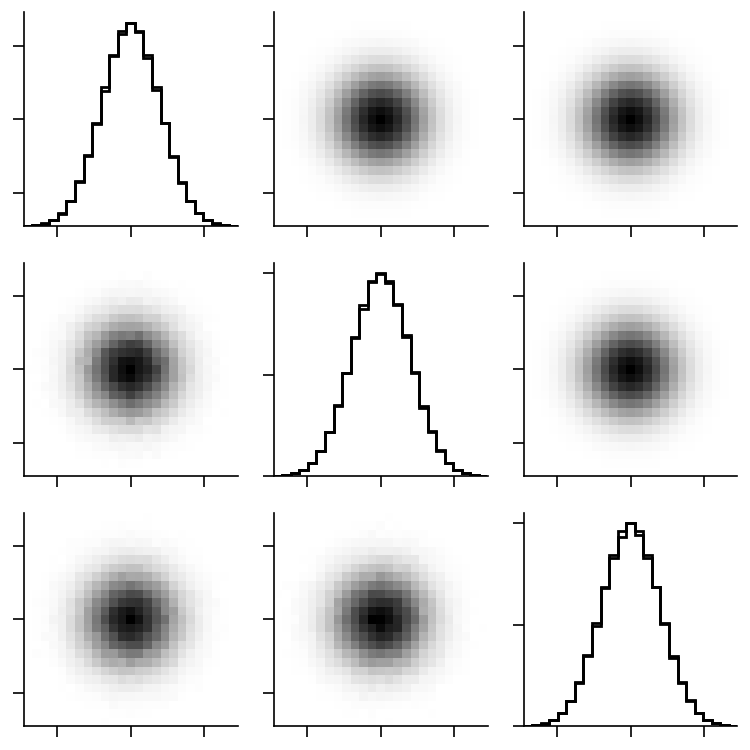

waterbag


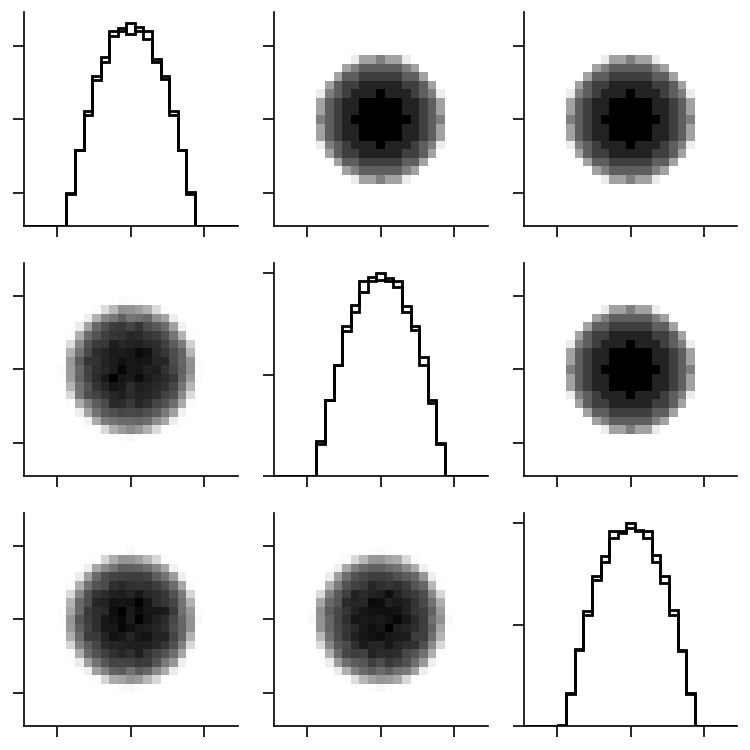

ndim=4
gaussian


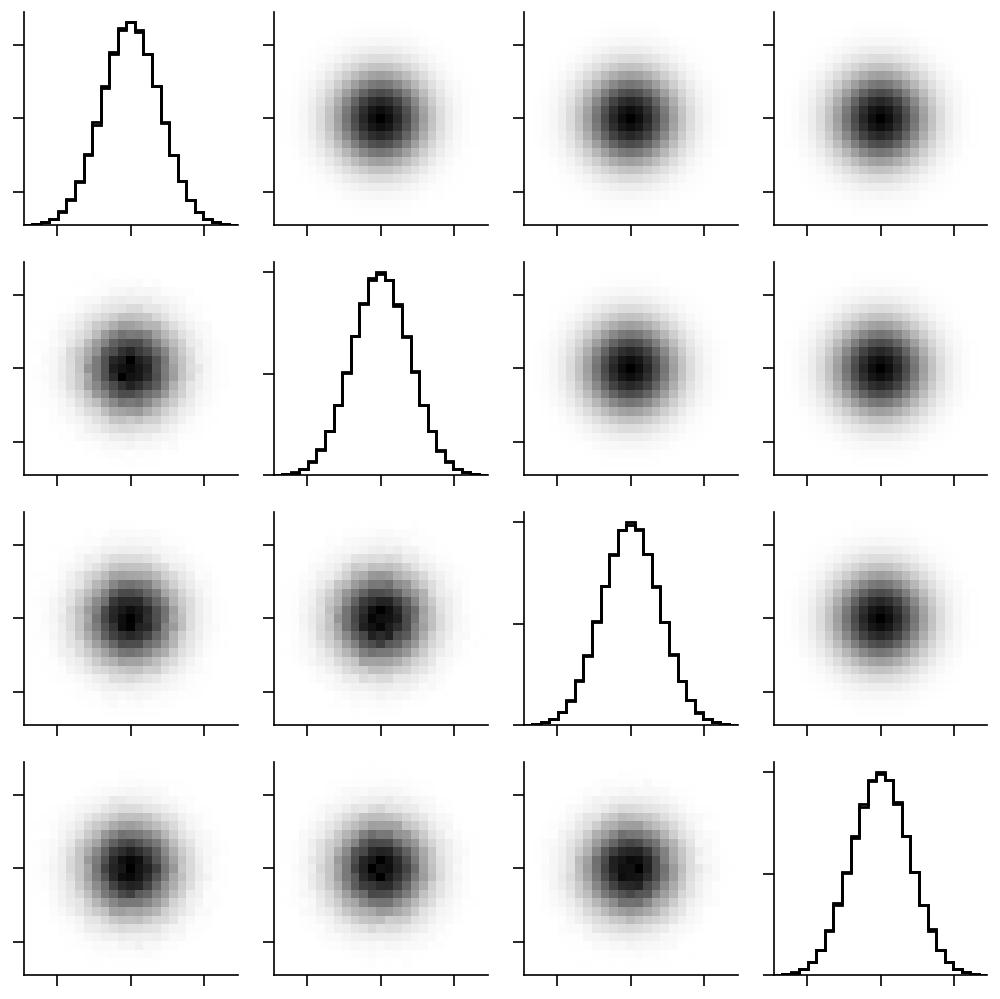

waterbag


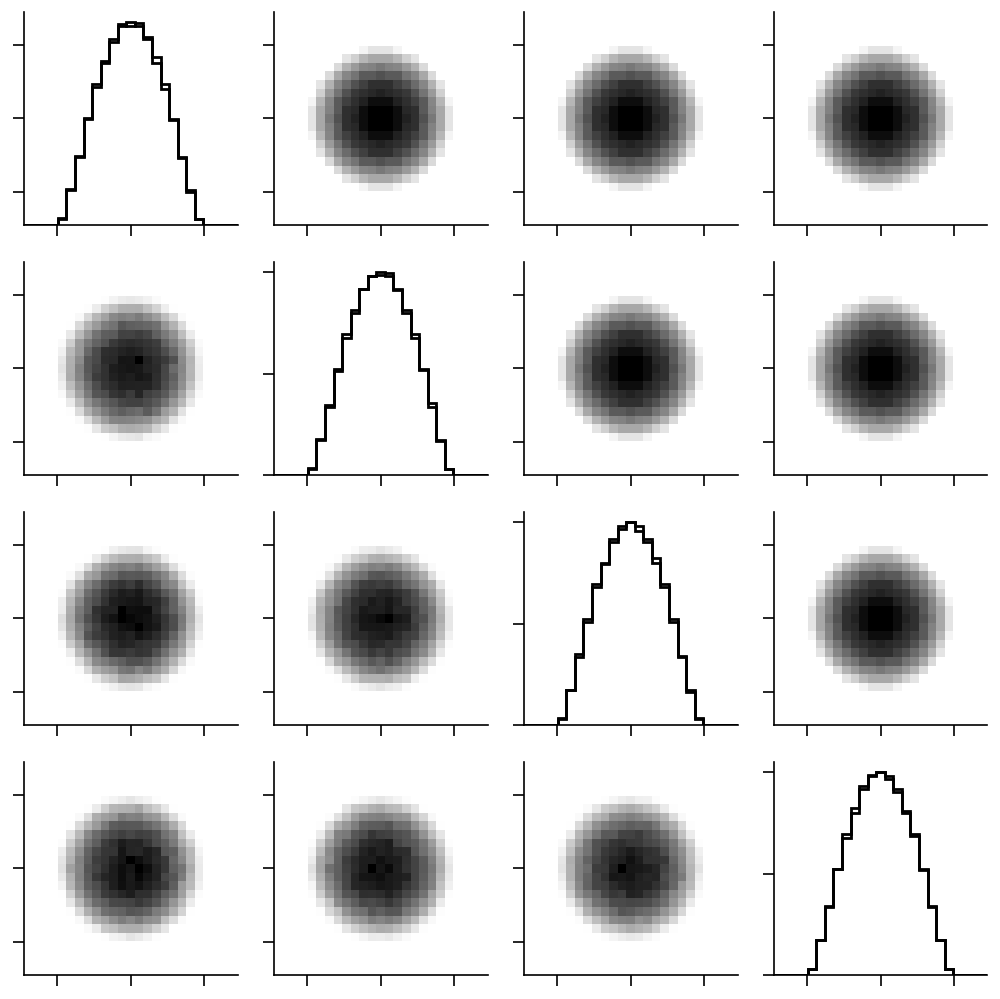

ndim=5
gaussian


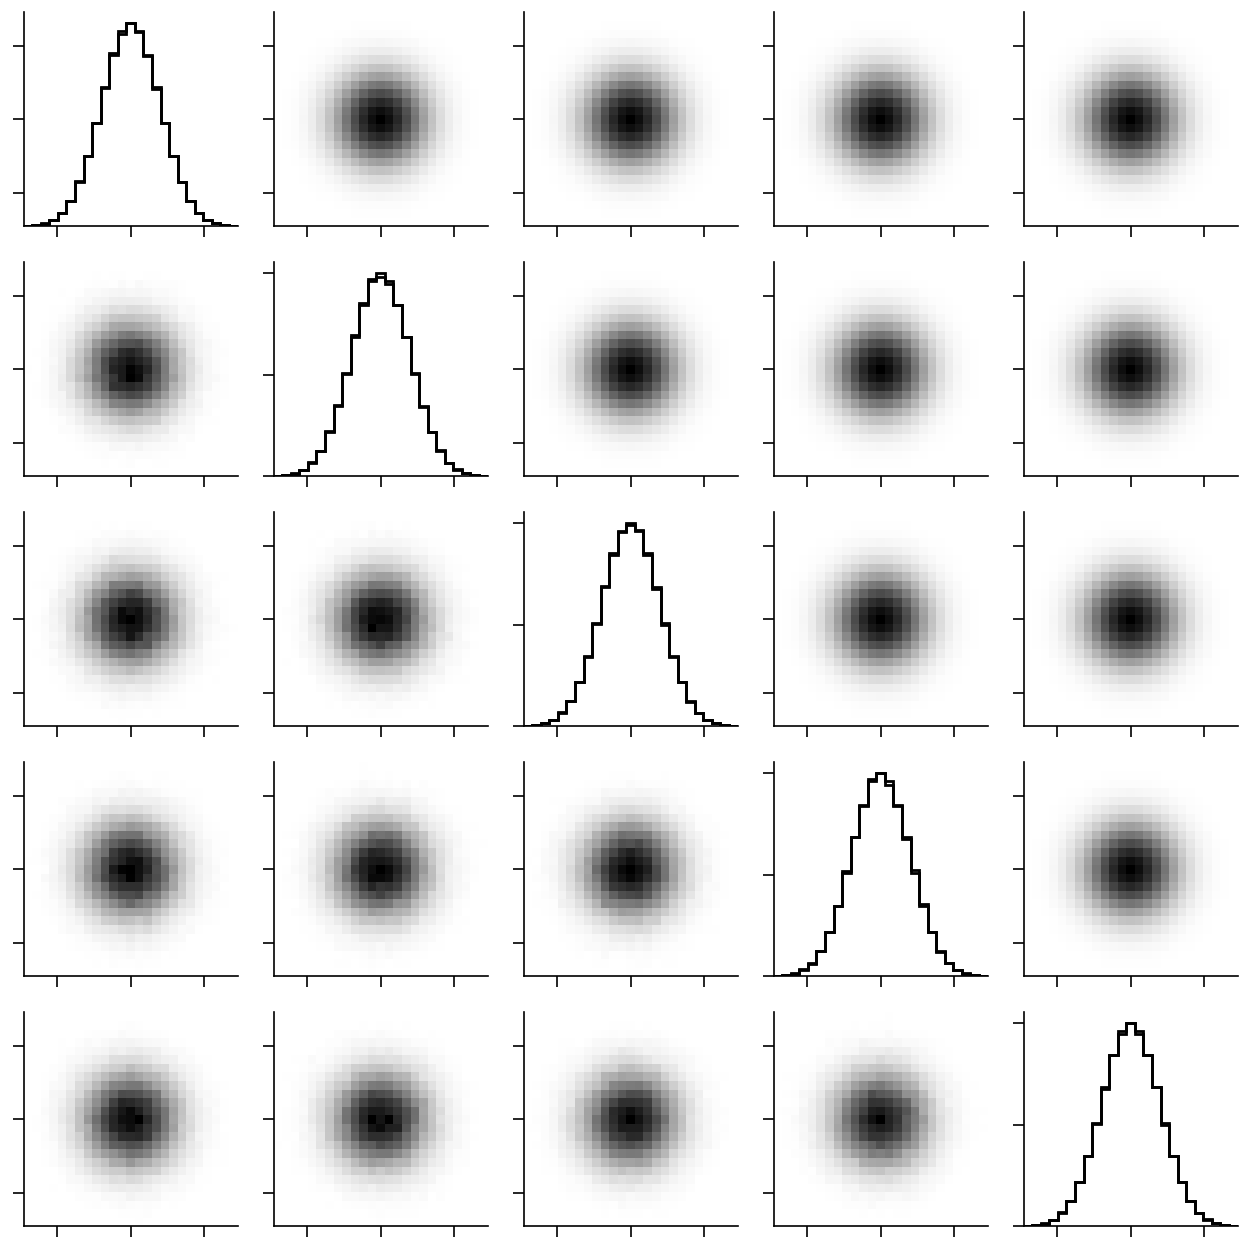

waterbag


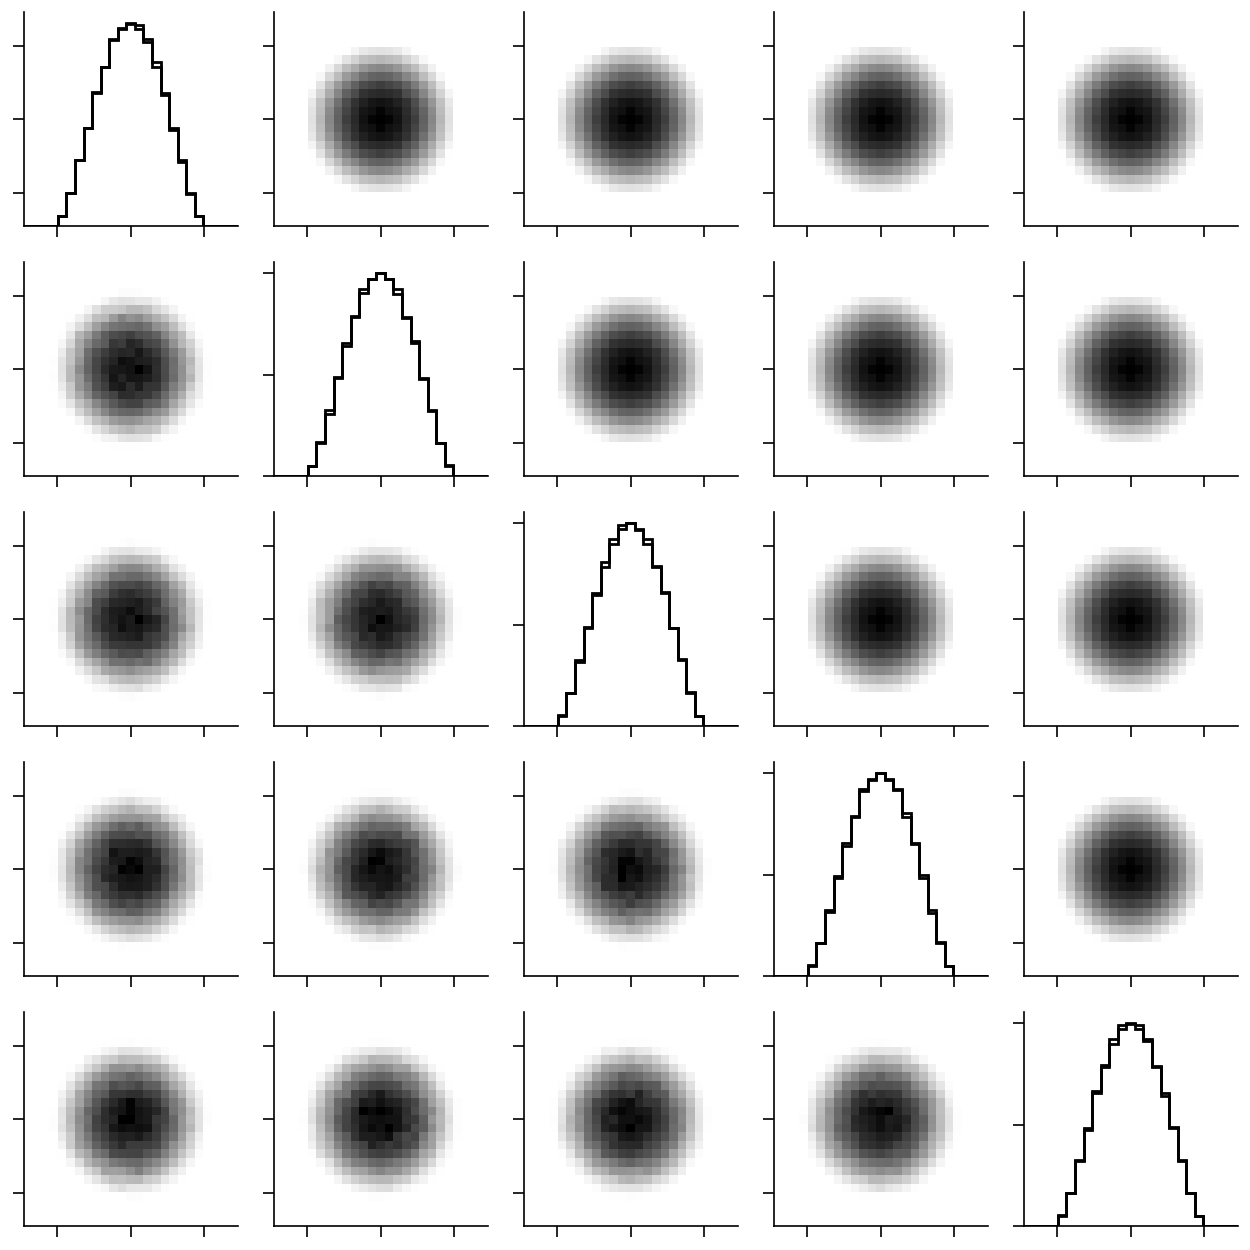

In [7]:
nsamp = 100_000
xmax = 3.5
res = 25

for ndim in [3, 4, 5]:
    print(f"ndim={ndim}")

    for name in names:
        print(name)

        dist = ps.get_distribution(name=name, ndim=ndim)
        x = dist.sample(nsamp)

        coords = ndim * [np.linspace(-xmax, xmax, res)]
        hist = ps.Histogram(coords=coords)

        grid = psv.CornerGrid(ndim, figwidth=(ndim * 1.25), corner=False)

        hist.values = dist.prob(hist.points()).reshape(hist.shape)
        grid.plot_hist(hist, lower=False, diag=True)

        hist.bin(x)
        grid.plot_hist(hist, upper=False, diag=True)

        grid.axs.format(xticklabels=[], yticklabels=[])
        plt.show()